# Data Wrangling Project Term 2 : WeRateDogs

## Scope of Project:

The scope of this project is to apply data wrangling skills to the dataset in tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

The project will be distributed in four sections namely,
1. Gathering Data
2. Assessing Data
3. Cleaning Data
4. Storing, Analysing and Visualizing Data 

## Gathering Data

**Twitter Archive File** 

In [704]:
# Importing all packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

In [705]:
# Read the twitter archive csv file

t_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [706]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [707]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [708]:
t_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://tw

**Twitter Image Predictions** 

In [709]:
# Download the image_predictions.tsv file programmatically

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)


In [710]:
#Read and store the downloaded image_predictions.tsv file

image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [813]:
# Using Twitter API to get Tweets with Specific Id

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

**Twitter JSON file Using APIs**

In [712]:
# Store all the matched tweet objects into the tweet_id_match list below.
tweet_id_match = []

tweet_ids = t_archive['tweet_id']
for i in range(0, len(tweet_ids), 100):
    ids = list(tweet_ids[i:i+100])
    statuses = api.statuses_lookup(ids)
    tweet_id_match.extend(statuses)
# end for


In [814]:
len(tweet_id_match)

2342

In [714]:
# Create a tweet_json.txt file to 

tweet_json = []
for each_tweet_id_matched in tweet_id_match:
    tweet_json.append(each_tweet_id_matched)

with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_json) + '\n')

In [715]:
# Read the .txt file line by line and append the json data to each line 

read_json = list()

with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for item in data:
        #data = json.loads(item)
        tweet_id = item['id']
        fav_count = item['favorite_count']
        retweet_count = item['retweet_count']
        retweeted_status = item['retweeted_status'] = 'Retweet' if 'retweeted_status' in item else 'Not a Retweet'
        
        read_json.append({'tweet_id': int(tweet_id),
                          'favorite_count': int(fav_count),
                          'retweet_count': int(retweet_count),
                          'retweeted_status':str(retweeted_status)})


In [716]:
        
# Creating a pandas dataframe
tweet_json_df = pd.DataFrame(read_json, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'retweeted_status'])
tweet_json_df.head()

,tweet_id,favorite_count,retweet_count,retweeted_status
0,876484053909872640,18502,2367,Not a Retweet
1,886366144734445568,20867,3145,Not a Retweet
2,877611172832227328,0,80,Retweet
3,888078434458587136,21421,3436,Not a Retweet
4,891689557279858688,41495,8496,Not a Retweet


In [717]:
#check contents of tweet_json_df

tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
tweet_id            2342 non-null int64
favorite_count      2342 non-null int64
retweet_count       2342 non-null int64
retweeted_status    2342 non-null object
dtypes: int64(3), object(1)
memory usage: 73.3+ KB


In [718]:
tweet_json_df.retweeted_status.value_counts()

Not a Retweet    2174
Retweet           168
Name: retweeted_status, dtype: int64

In [719]:
# Create a csv file of tweet_json_df

tweet_json_df.to_csv('tweet_json_df', index = False)

## Assessing Data

**Visual Assessment**

In [721]:
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [722]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [723]:
tweet_json_df

,tweet_id,favorite_count,retweet_count,retweeted_status
0,876484053909872640,18502,2367,Not a Retweet
1,886366144734445568,20867,3145,Not a Retweet
2,877611172832227328,0,80,Retweet
3,888078434458587136,21421,3436,Not a Retweet
4,891689557279858688,41495,8496,Not a Retweet
5,879492040517615616,23077,3139,Not a Retweet
6,878604707211726852,29830,7099,Not a Retweet
7,879674319642796034,307,10,Not a Retweet
8,884876753390489601,27498,5550,Not a Retweet
9,882992080364220416,23599,3859,Not a Retweet


### Programmatic Assessment

#### Programmatic Assessment : t_archive

In [724]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [725]:
# There are no duplicate tweet ids

sum(t_archive.tweet_id.duplicated())

0

In [726]:
# Checking what values exist for source

t_archive.source.unique() 

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [727]:
# Checking the contents of each of four columns

t_archive.doggo.unique(), t_archive.floofer.unique() , t_archive.pupper.unique(), t_archive.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [728]:
#Checking for missing or multiple dog stages

t_archive['num_dog_stage'] = (t_archive.doggo != 'None').astype(int) + \
(t_archive.floofer != 'None').astype(int) + \
(t_archive.pupper != 'None').astype(int) + \
(t_archive.puppo != 'None').astype(int)

t_archive['num_dog_stage'].value_counts()

0    1976
1     366
2      14
Name: num_dog_stage, dtype: int64

In [729]:
# Checking records having more than one dog stage.

t_archive[t_archive.num_dog_stage == 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,num_dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo,2
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None,2
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,2
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None,2
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None,2
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,2
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,2
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,2
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupp

In [730]:
#Increasing the column width to access the text and check the data for more than 1 dog stage

pd.options.display.max_colwidth = 200

#t_archive[t_archive.num_dog_stage == 2].text
print(t_archive.iloc[191]['text']) # one dog : dog_stage is puppo : set doggo to none
print(t_archive.iloc[200]['text']) # one dog : dog_stage is floofer : set doggo to none
print(t_archive.iloc[460]['text']) # one dog : dog_stage is doggo : set pupper to none
print(t_archive.iloc[531]['text']) # two dogs : drop record
print(t_archive.iloc[565]['text']) # two dogs : drop record
print(t_archive.iloc[575]['text']) # two dogs : drop record
print(t_archive.iloc[705]['text']) # one dog : dog_stage is doggo, set pupper to None
print(t_archive.iloc[733]['text']) # two dogs : drop record
print(t_archive.iloc[778]['text']) # two dogs : drop record :will be removed as is retweet
print(t_archive.iloc[822]['text']) # two dogs : drop record :will be removed as is retweet
print(t_archive.iloc[889]['text']) # two dogs : drop record
print(t_archive.iloc[956]['text']) # Drop Record as not clear indication on dog stage
print(t_archive.iloc[1063]['text']) # two dogs : drop record
print(t_archive.iloc[1113]['text']) # two dogs : drop record

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.

In [731]:
t_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [732]:
#Check if expanded_urls have images. 

t_archive[t_archive.expanded_urls.isnull()]

# it can be observed that the expanded_url column has no images for some records that were found while spot checking.
# such records can be ignored.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,num_dog_stage
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,0
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,0
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,0
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None,0
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,0
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,0
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None,0
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,0
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None,0
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None,0


In [733]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [734]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [735]:
sum(image_predictions.duplicated())

0

In [736]:
sum(image_predictions.jpg_url.duplicated()) 

66

In [737]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
tweet_id            2342 non-null int64
favorite_count      2342 non-null int64
retweet_count       2342 non-null int64
retweeted_status    2342 non-null object
dtypes: int64(3), object(1)
memory usage: 73.3+ KB


In [738]:
tweet_json_df.head()

,tweet_id,favorite_count,retweet_count,retweeted_status
0,876484053909872640,18502,2367,Not a Retweet
1,886366144734445568,20867,3145,Not a Retweet
2,877611172832227328,0,80,Retweet
3,888078434458587136,21421,3436,Not a Retweet
4,891689557279858688,41495,8496,Not a Retweet


In [739]:
sum(tweet_json_df.duplicated())

0

### Quality (Checking for content related issues) ONLY 7 NEED TO ADD A FEW

#### t_archive
1. Clean the rows that have more than two dog stages
2. Remove retweets. Keep original ratings only
3. Datatype of timestamp is string format instead of datetime
4. Delete columns that will not be used in analysis
5. Create a cleaned source column for tweet source
6. Remove records that have no images in the in expanded_url column

#### image_prediction

1. Create 1 column for image prediction and 1 column for confidence level
2. Delete columns that won't be used for analysis
3. Remove the duplicates in jpg_url duplicated 

#### tweet_json_df
1. Ignore retweets

### Tidiness

1. Consolidate the doggo, floofer, pupper, puppo columns into one column dog_stage for t_archive dataset
2. All three datasets should be one table

## Cleaning Data

In [740]:
# Create a copy of each dataframe

t_archive_clean = t_archive.copy()
image_predict_clean = image_predictions.copy()
tweet_json_clean = tweet_json_df.copy()

### Quality

#### Define: 

t_archive : Clean the rows that have more than two dog stages. Remove the records that have two dogs and correct the records for which we identified having two dog stages in the assessment section but should have only one dog stage.

#### Code: Correcting records that two dog stages

In [741]:
print(t_archive.iloc[191]['text']) # one dog : dog_stage is puppo : set doggo to none
print(t_archive.iloc[200]['text']) # one dog : dog_stage is floofer : set doggo to none
print(t_archive.iloc[460]['text']) # one dog : dog_stage is doggo : set pupper to none
print(t_archive.iloc[705]['text']) # one dog : dog_stage is doggo, set pupper to None

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd


In [742]:
t_archive_clean.at[191,'doggo'] = 'None'

#### Test : testing if the operation worked for this one record

In [743]:
t_archive_clean.iloc[191]

tweet_id                                                                                                                                                                  855851453814013952
in_reply_to_status_id                                                                                                                                                                    NaN
in_reply_to_user_id                                                                                                                                                                      NaN
timestamp                                                                                                                                                          2017-04-22 18:31:02 +0000
source                                                                                                    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          Here's a puppo participat

#### Code to clean the rest of values

In [744]:

t_archive_clean.at[200,'doggo'] = 'None' # one dog : dog_stage is floofer : set doggo to none
t_archive_clean.at[460,'pupper'] = 'None' # one dog : dog_stage is doggo : set pupper to none
t_archive_clean.at[705,'pupper'] = 'None' # one dog : dog_stage is doggo, set pupper to None

#### Test: test the records updated dog stage to 1 instead or 2

In [745]:
t_archive_clean['num_dog_stage'] = (t_archive_clean.doggo != 'None').astype(int) + \
(t_archive_clean.floofer != 'None').astype(int) + \
(t_archive_clean.pupper != 'None').astype(int) + \
(t_archive_clean.puppo != 'None').astype(int)

print(t_archive_clean.iloc[191]['num_dog_stage'])
print(t_archive_clean.iloc[200]['num_dog_stage'])
print(t_archive_clean.iloc[460]['num_dog_stage'])
print(t_archive_clean.iloc[705]['num_dog_stage'])

1
1
1
1


#### Code: Dropping records that have two dogs in them

In [746]:
print(t_archive.iloc[531]['text']) # two dogs : drop record
print(t_archive.iloc[565]['text']) # two dogs : drop record
print(t_archive.iloc[575]['text']) # two dogs : drop record
print(t_archive.iloc[733]['text']) # two dogs : drop record
print(t_archive.iloc[889]['text']) # two dogs : drop record
print(t_archive.iloc[1113]['text']) # two dogs : drop record
print(t_archive.iloc[956]['text']) # Drop Record as not clear indication on dog stage

# The records below are retweets and are also removed
print(t_archive.iloc[778]['text']) # two dogs : drop record :will be removed as is retweet
print(t_archive.iloc[822]['text']) # two dogs : drop record :will be removed as is retweet
print(t_archive.iloc[1063]['text']) # two dogs : drop record


Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
This is just downright prec

In [747]:
len(t_archive_clean)

2356

In [748]:
t_archive_clean.drop([531, 565, 575, 733, 889, 1113, 956, 778, 822, 1063], inplace = True)

#### Test

In [749]:
len(t_archive_clean)

2346

#### Define : 
t_archive : Remove retweets.

The retweeted_status_id and retweeted_status_user_id columns in the table both have 181 values that need to be removed. Only consider the values that are null (i.e. NaN). Use pd.isnull to filter these values. We can use either of these columns.

#### Code : 

In [750]:
t_archive_clean = t_archive_clean[pd.isnull(t_archive_clean['retweeted_status_id'])]

#### Test : 

In [751]:
sum(t_archive_clean.retweeted_status_id.value_counts()), sum(t_archive_clean.retweeted_status_user_id.value_counts())

(0, 0)

In [752]:
t_archive_clean.info() # Choose the columns to drop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2167 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2167 non-null object
source                        2167 non-null object
text                          2167 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2109 non-null object
rating_numerator              2167 non-null int64
rating_denominator            2167 non-null int64
name                          2167 non-null object
doggo                         2167 non-null object
floofer                       2167 non-null object
pupper                        2167 non-null object
puppo                         2167 non-null object
num_dog_stage                 2167 non

#### Define : 
t_archive : Delete (drop) columns that will not be used in analysis. 
1. Since we have removed the retweet data we can delete the columns, retweeted_status_id and retweeted_status_user_id.
2. We can also delete the columns that will not be used further in this analysis. The columns namely, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id
3. Remove the num_dog_stage column


#### Code : 

In [753]:
t_archive_clean = t_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                                        'retweeted_status_timestamp','num_dog_stage', 
                                        'in_reply_to_status_id', 'in_reply_to_user_id'], 1)

#### Test:

In [754]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2167 non-null int64
timestamp             2167 non-null object
source                2167 non-null object
text                  2167 non-null object
expanded_urls         2109 non-null object
rating_numerator      2167 non-null int64
rating_denominator    2167 non-null int64
name                  2167 non-null object
doggo                 2167 non-null object
floofer               2167 non-null object
pupper                2167 non-null object
puppo                 2167 non-null object
dtypes: int64(3), object(9)
memory usage: 220.1+ KB


#### Define : 
t_archive : Datatype of column timestamp is string format instead of datetime. Correct it using pd.to_datetime

#### Code:

In [755]:
t_archive_clean.timestamp = pd.to_datetime(t_archive_clean.timestamp)

#### Test:

In [756]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2167 non-null int64
timestamp             2167 non-null datetime64[ns]
source                2167 non-null object
text                  2167 non-null object
expanded_urls         2109 non-null object
rating_numerator      2167 non-null int64
rating_denominator    2167 non-null int64
name                  2167 non-null object
doggo                 2167 non-null object
floofer               2167 non-null object
pupper                2167 non-null object
puppo                 2167 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.1+ KB


#### Define:

t_archive : Create a cleaned source column for tweet source using reg expression.

#### Code:

In [757]:
source = t_archive_clean.source.str.extract(r'>([^<]*)<', expand = False)

t_archive_clean['source'] = source

#### Test:

In [758]:
t_archive_clean['source'].value_counts()

Twitter for iPhone     2035
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define :

t_archive : Remove records that have no images in the in expanded_url column

#### Code :

In [759]:
# Find the number of records that need to be removed.

sum(t_archive_clean.expanded_urls.isnull())

58

In [760]:
t_archive_clean = t_archive_clean[t_archive_clean.expanded_urls.notnull()]

In [761]:
t_archive_clean['source'].value_counts()

Twitter for iPhone     1978
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#### Test:

In [762]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
doggo                 2109 non-null object
floofer               2109 non-null object
pupper                2109 non-null object
puppo                 2109 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 214.2+ KB


#### Define : 
image_prediction : There are three predictions with their respective confidence levels. Let us consolidate all these three in to have only two columns one having dog breed prediction and the other the confidence level for the same. The idea is to take the first 'p1' prediction and its confidence, if this data isn't available then hop to p2 and its confidence and then so on. 

In [763]:
image_predict_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Code: 

In [764]:
#Check to see p1_conf >= p2_conf >= p3_conf

print((image_predict_clean['p1_conf'] <= image_predict_clean['p2_conf']).value_counts())

print((image_predict_clean['p2_conf'] <= image_predict_clean['p3_conf']).value_counts())

False    2075
dtype: int64
False    2075
dtype: int64


In [765]:
breed = []
conf = []

def predict(image_predict_clean):
    if image_predict_clean['p1_dog'] == True:
        breed.append(image_predict_clean['p1'])
        conf.append(image_predict_clean['p1_conf'])
    elif image_predict_clean['p2_dog'] == True:
        breed.append(image_predict_clean['p2'])
        conf.append(image_predict_clean['p2_conf'])
    elif image_predict_clean['p3_dog'] == True:
        breed.append(image_predict_clean['p3'])
        conf.append(image_predict_clean['p3_conf'])
    else:
        breed.append('not found')
        conf.append('not found')

image_predict_clean.apply(predict, axis = 1)

image_predict_clean['breed'] = breed
image_predict_clean['conf'] = conf

In [766]:
print((image_predict_clean['breed'] == 'not found').value_counts(), 
 (image_predict_clean['conf'] == 'not found').value_counts())

False    1751
True      324
Name: breed, dtype: int64 False    1751
True      324
Name: conf, dtype: int64


In [767]:
#Ignore the data for which there are no records for breed and confidence

image_predict_clean = image_predict_clean[image_predict_clean['conf'] != 'not found']

#### Test

In [768]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
breed       1751 non-null object
conf        1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


#### Define : 
image_prediction : Delete columns not required for analysis using drop

#### Code:

In [769]:
image_predict_clean = image_predict_clean.drop(['img_num',
                                                'p1','p1_conf','p1_dog',
                                                'p2','p2_conf','p2_dog',
                                                'p3','p3_conf','p3_dog'], 1)

#### Test:

In [770]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
breed       1751 non-null object
conf        1751 non-null object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


#### Define :

image_predictions : Remove the duplicates in jpg_url duplicated

#### Code:

In [771]:
image_predict_clean = image_predict_clean.drop_duplicates(subset=['jpg_url'], keep = 'last')

In [772]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id    1691 non-null int64
jpg_url     1691 non-null object
breed       1691 non-null object
conf        1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


#### Define : 
tweet_json_df : Remove retweets. Remove the records having retweeted_status != 'Not a Retweet'

#### Code : 

In [773]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Not a Retweet']

#### Test:

In [774]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2341
Data columns (total 4 columns):
tweet_id            2174 non-null int64
favorite_count      2174 non-null int64
retweet_count       2174 non-null int64
retweeted_status    2174 non-null object
dtypes: int64(3), object(1)
memory usage: 84.9+ KB


### Tidiness

####  Define:

t_archive : Consolidate the doggo, floofer, pupper, puppo columns into one column dog_stage and drop these columns from t_archive_clean

#### Code:

In [775]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
doggo                 2109 non-null object
floofer               2109 non-null object
pupper                2109 non-null object
puppo                 2109 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 214.2+ KB


In [776]:
# Dropping the doggo, floofer, pupper, puppo columns

t_archive_clean= pd.melt(t_archive_clean, id_vars=['tweet_id',                                          
                                                    'timestamp',
                                                    'source', 
                                                    'text', 
                                                    'expanded_urls',
                                                    'rating_numerator',
                                                    'rating_denominator',
                                                    'name'],
                               value_name='dog_stage')

In [777]:
t_archive_clean.dog_stage.value_counts()

None       8106
pupper      222
doggo        74
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [778]:
t_archive_clean = t_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [779]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 2025 to 6654
Data columns (total 10 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
variable              2109 non-null object
dog_stage             2109 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 181.2+ KB


In [780]:
#Drop the column named variable

t_archive_clean = t_archive_clean.drop('variable', 1)

#### Test:

In [781]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 2025 to 6654
Data columns (total 9 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
dog_stage             2109 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 164.8+ KB


In [782]:
t_archive_clean.dog_stage.value_counts()

None       1779
pupper      222
doggo        74
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [783]:
t_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2025,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,None
2024,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11,10,Hall,None
2023,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,None
2022,667517642048163840,2015-11-20 01:39:42,Twitter Web Client,This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,https://twitter.com/dog_rates/status/667517642048163840/photo/1,8,10,Dook,None
2021,667524857454854144,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,None


## Tidiness:


#### Define: 

All three datasets should be one table

In [784]:
#check dtype of tweet_id in all dataframes

t_archive_clean.tweet_id.dtype, image_predict_clean.tweet_id.dtype, tweet_json_clean.tweet_id.dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [785]:
t_archive_clean.shape, image_predict_clean.shape

((2109, 9), (1691, 4))

#### Code: 

In [786]:
#Merger the t_archive_clean and image_predict_clean

merge_df = pd.merge(t_archive_clean, image_predict_clean,
                      how = 'left', on = ['tweet_id'])

#### Test

In [787]:
merge_df.info(), tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2108
Data columns (total 12 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
dog_stage             2109 non-null object
jpg_url               1621 non-null object
breed                 1621 non-null object
conf                  1621 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 214.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2341
Data columns (total 4 columns):
tweet_id            2174 non-null int64
favorite_count      2174 non-null int64
retweet_count       2174 non-null int64
retweeted_status    2174 non-null object
dtypes: int64(3), object(1)
memory

(None, None)

In [788]:
merge_df['source'].value_counts()

Twitter for iPhone     1978
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [789]:
#Finally merge the tweet_json_clean dataset

final_merge = pd.merge(merge_df, tweet_json_clean, how = 'left', on = ['tweet_id']) 

In [790]:
final_merge['source'].value_counts()

Twitter for iPhone     1978
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#### Test:

In [791]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2108
Data columns (total 15 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null int64
rating_denominator    2109 non-null int64
name                  2109 non-null object
dog_stage             2109 non-null object
jpg_url               1621 non-null object
breed                 1621 non-null object
conf                  1621 non-null object
favorite_count        2108 non-null float64
retweet_count         2108 non-null float64
retweeted_status      2108 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 263.6+ KB


In [792]:
# Ignore records without images
final_merge = final_merge[final_merge['jpg_url'].notnull()]

In [793]:
final_merge['source'].value_counts() #Vine Data is missing due to filtering

Twitter for iPhone    1592
Twitter Web Client      20
TweetDeck                9
Name: source, dtype: int64

In [794]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 0 to 2108
Data columns (total 15 columns):
tweet_id              1621 non-null int64
timestamp             1621 non-null datetime64[ns]
source                1621 non-null object
text                  1621 non-null object
expanded_urls         1621 non-null object
rating_numerator      1621 non-null int64
rating_denominator    1621 non-null int64
name                  1621 non-null object
dog_stage             1621 non-null object
jpg_url               1621 non-null object
breed                 1621 non-null object
conf                  1621 non-null object
favorite_count        1620 non-null float64
retweet_count         1620 non-null float64
retweeted_status      1620 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 202.6+ KB


#### Define:
 convert all breed and names to lower case and change breeds having underscore with spaces. 

#### Code:

In [795]:
# Convert all string values in the dataframe to lower case

breed = final_merge.breed.str.lower().replace(r'[\s_]+', ' ', regex=True)
final_merge['breed'] = breed

#### Test:

In [796]:
final_merge['breed'].value_counts()

golden retriever                  141
labrador retriever                102
pembroke                           94
chihuahua                          87
pug                                60
toy poodle                         50
chow                               45
pomeranian                         42
samoyed                            38
malamute                           32
chesapeake bay retriever           31
french bulldog                     30
cocker spaniel                     26
miniature pinscher                 24
eskimo dog                         22
german shepherd                    21
siberian husky                     20
shih-tzu                           20
staffordshire bullterrier          20
maltese dog                        19
cardigan                           19
beagle                             19
rottweiler                         19
shetland sheepdog                  19
kuvasz                             18
lakeland terrier                   17
italian grey

#### Code:

In [797]:
dog_name = final_merge.name.str.lower().replace(r'[\s_]+', ' ', regex=True)
final_merge['name'] = dog_name


#### Test:

In [798]:
final_merge['name'].value_counts()

none        401
a            46
lucy         10
cooper       10
charlie      10
oliver        9
tucker        8
daisy         7
sadie         7
penny         7
the           7
winston       7
jax           6
toby          6
koda          6
bella         5
stanley       5
leo           5
oscar         5
lola          5
oakley        4
an            4
bailey        4
finn          4
sophie        4
brody         4
dexter        4
winnie        4
louis         4
cassie        4
           ... 
harry         1
ollie         1
stark         1
kona          1
timmy         1
willow        1
fwed          1
mona          1
vixen         1
hector        1
eleanor       1
poppy         1
karll         1
berkeley      1
jeremy        1
dallas        1
dietrich      1
pickles       1
clarq         1
mary          1
brad          1
gidget        1
samsom        1
lambeau       1
maximus       1
opie          1
hall          1
kaiya         1
lillie        1
sansa         1
Name: name, Length: 827,

#### Define:

final_merge : create a variable called rating and convert conf column dtype as float

#### Code:

In [799]:
final_merge['rating'] = final_merge.rating_numerator / final_merge.rating_denominator

In [800]:
final_merge['conf'] = final_merge['conf'].astype(float)

#### Test

In [801]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621 entries, 0 to 2108
Data columns (total 16 columns):
tweet_id              1621 non-null int64
timestamp             1621 non-null datetime64[ns]
source                1621 non-null object
text                  1621 non-null object
expanded_urls         1621 non-null object
rating_numerator      1621 non-null int64
rating_denominator    1621 non-null int64
name                  1621 non-null object
dog_stage             1621 non-null object
jpg_url               1621 non-null object
breed                 1621 non-null object
conf                  1621 non-null float64
favorite_count        1620 non-null float64
retweet_count         1620 non-null float64
retweeted_status      1620 non-null object
rating                1621 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 215.3+ KB


## Storing & Analysing Data

In [802]:
# Store the dataframe in a csv file

final_merge.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Insights & Visualizations

### 1. Breed Count and Breed Rating (mean) Relationship

In [803]:
breed_mean = final_merge.groupby('breed').mean()['rating'].sort_values()
breed_mean

breed
japanese spaniel               0.500000
afghan hound                   0.800000
soft-coated wheaten terrier    0.880000
walker hound                   0.900000
scotch terrier                 0.900000
tibetan terrier                0.925000
boston bull                    0.941667
dalmatian                      0.944444
saint bernard                  0.950000
welsh springer spaniel         0.950000
maltese dog                    0.952632
dandie dinmont                 0.957143
miniature schnauzer            0.960000
norwich terrier                0.960000
redbone                        0.966667
english setter                 0.971429
rhodesian ridgeback            0.975000
scottish deerhound             0.975000
irish terrier                  0.980000
great dane                     0.981818
airedale                       0.983333
papillon                       0.983333
mexican hairless               0.985714
newfoundland                   0.985714
miniature poodle               0.9

In [804]:
breed_count = final_merge.groupby('breed').count()['rating'].sort_values()
breed_count

breed
bouvier des flandres                1
japanese spaniel                    1
scotch terrier                      1
standard schnauzer                  1
clumber                             1
irish wolfhound                     1
entlebucher                         1
silky terrier                       1
afghan hound                        2
sussex spaniel                      2
black-and-tan coonhound             2
wire-haired fox terrier             2
australian terrier                  2
appenzeller                         2
groenendael                         2
greater swiss mountain dog          3
irish setter                        3
curly-coated retriever              3
irish water spaniel                 3
komondor                            3
cairn                               3
leonberg                            3
toy terrier                         3
brabancon griffon                   3
tibetan mastiff                     3
briard                              3
weimar

In [805]:
breed_df = pd.DataFrame()
breed_df['breed_count'] = breed_count
breed_df['breed_mean_rating'] = breed_mean
breed_df

,breed_count,breed_mean_rating
breed,,
bouvier des flandres,1,1.300000
japanese spaniel,1,0.500000
scotch terrier,1,0.900000
standard schnauzer,1,1.200000
clumber,1,2.700000
irish wolfhound,1,1.100000
entlebucher,1,1.100000
silky terrier,1,1.200000
afghan hound,2,0.800000


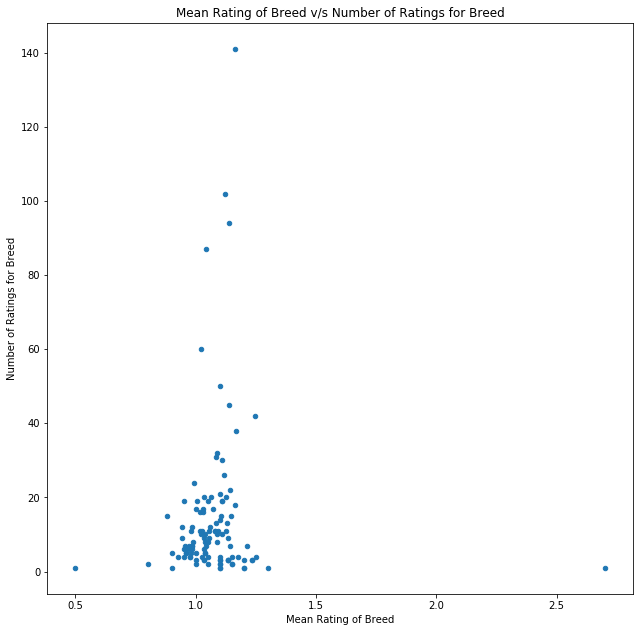

In [806]:
# Plotting breed_count v/s breed_mean_rating

breed_df.plot(x='breed_mean_rating', y='breed_count', kind='scatter')
plt.xlabel('Mean Rating of Breed')
plt.ylabel('Number of Ratings for Breed')
plt.title('Mean Rating of Breed v/s Number of Ratings for Breed')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
fig.savefig('breed_count_vs_breed_mean_rating.png', dpi = 100);

### 2. Breed Distribution

In [807]:
x = breed_df[breed_df['breed_count'] > 14]
x.head()

,breed_count,breed_mean_rating
breed,,
great pyrenees,15,1.146667
soft-coated wheaten terrier,15,0.880000
old english sheepdog,15,1.106667
west highland white terrier,16,1.018750
american staffordshire terrier,16,1.031250


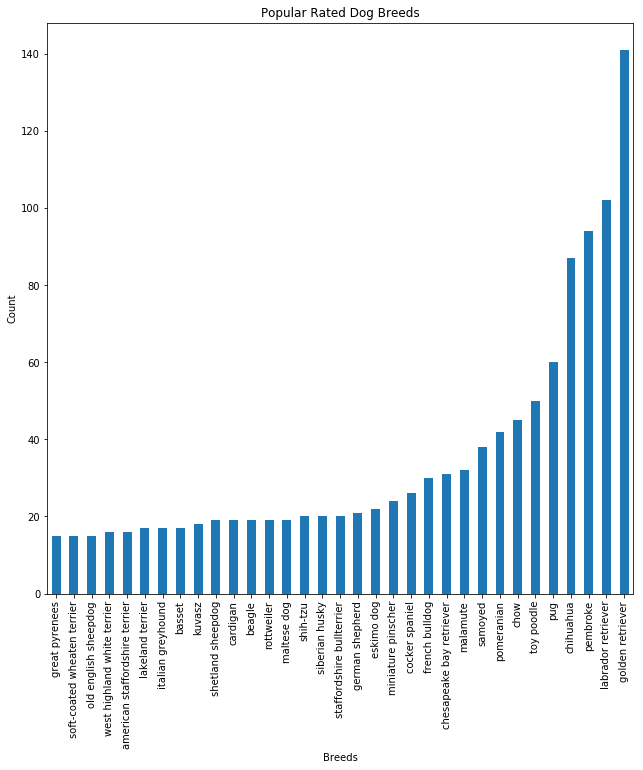

In [808]:
x.breed_count.plot(kind = 'bar')
plt.title('Popular Rated Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
fig.savefig('Popular Rated Dog Breeds.png', dpi = 100);

### 3. Source of Tweets

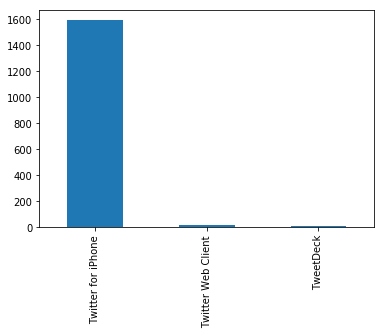

In [809]:
final_merge['source'].value_counts().plot(kind = 'bar') #Vine data does not show up

### 4. Perdiction Confidence per Breed

In [810]:
breed_conf = final_merge.groupby('breed').mean()['conf'].nlargest(20)
breed_conf.head()

breed
komondor            0.972531
clumber             0.946718
keeshond            0.844431
bull mastiff        0.815618
brittany spaniel    0.775591
Name: conf, dtype: float64

In [811]:
final_merge.groupby('breed').mean()['conf'].nsmallest(20).head()

breed
irish wolfhound         0.063078
bouvier des flandres    0.082610
scottish deerhound      0.143519
norwich terrier         0.246893
cairn                   0.262196
Name: conf, dtype: float64

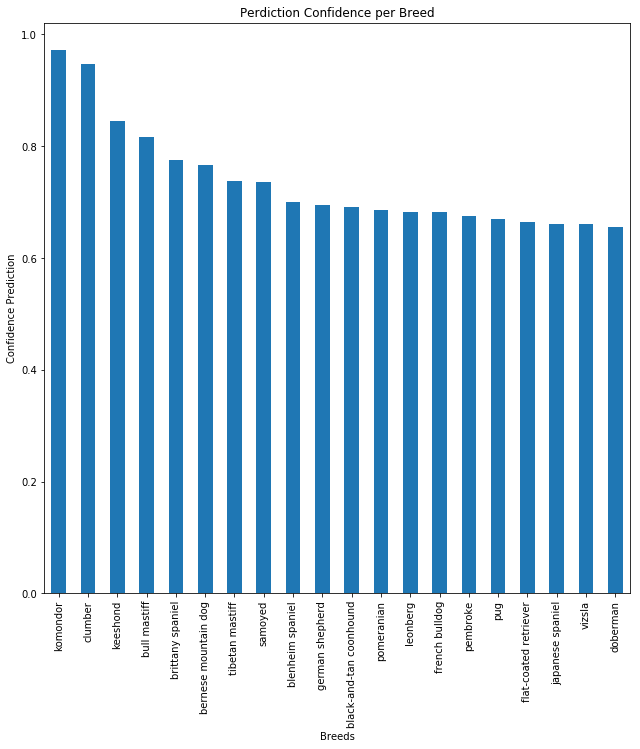

In [812]:
breed_conf.plot(kind = 'bar')
plt.title('Perdiction Confidence per Breed')
plt.xlabel('Breeds')
plt.ylabel('Confidence Prediction')
fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
fig.savefig('Perdiction Confidence per Breed.png', dpi = 100);

## References:
1. stackoverflow
2. tweepy api documentation (https://tweepy.readthedocs.io/en/v3.5.0/api.html)
3. Udacity documentation for creating the twitter api key
4. matplotlib documentation
5. pandas documentation
6. google search for dog breeds